<a href="https://colab.research.google.com/github/PJZoio/DocProduct/blob/master/Modelo_classificacao_Estadio_com_inferencia_(miniNIR)_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                             precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from tqdm import tqdm  # For progress bar during bootstrapping
import joblib  # For model serialization
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving 2025.02.13-miniNir (solucoes simples)-Creatinina-Estadio.csv to 2025.02.13-miniNir (solucoes simples)-Creatinina-Estadio.csv



Evaluating LDA...

LDA Training Performance:
Accuracy: 0.493 | Precision: 0.568 | Recall: 0.493 | F1 Score: 0.448 | Specificity: 0.882 | AUC: 0.801

LDA Validation Performance:
Accuracy: 0.350 | Precision: 0.356 | Recall: 0.350 | F1 Score: 0.324 | Specificity: 0.852 | AUC: 0.716

Evaluating SVM...

SVM Training Performance:
Accuracy: 0.550 | Precision: 0.547 | Recall: 0.550 | F1 Score: 0.453 | Specificity: 0.895 | AUC: 0.954

SVM Validation Performance:
Accuracy: 0.450 | Precision: 0.326 | Recall: 0.450 | F1 Score: 0.347 | Specificity: 0.871 | AUC: 0.872

Evaluating Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Training Performance:
Accuracy: 1.000 | Precision: 1.000 | Recall: 1.000 | F1 Score: 1.000 | Specificity: 1.000 | AUC: 1.000

Random Forest Validation Performance:
Accuracy: 0.733 | Precision: 0.769 | Recall: 0.733 | F1 Score: 0.736 | Specificity: 0.938 | AUC: 0.961

Evaluating Gradient Boosting...

Gradient Boosting Training Performance:
Accuracy: 1.000 | Precision: 1.000 | Recall: 1.000 | F1 Score: 1.000 | Specificity: 1.000 | AUC: 1.000

Gradient Boosting Validation Performance:
Accuracy: 0.667 | Precision: 0.717 | Recall: 0.667 | F1 Score: 0.665 | Specificity: 0.922 | AUC: 0.893

Evaluating XGBoost...

XGBoost Training Performance:
Accuracy: 1.000 | Precision: 1.000 | Recall: 1.000 | F1 Score: 1.000 | Specificity: 1.000 | AUC: 1.000

XGBoost Validation Performance:
Accuracy: 0.650 | Precision: 0.662 | Recall: 0.650 | F1 Score: 0.638 | Specificity: 0.922 | AUC: 0.941

Evaluating Logistic Regression...

Logistic Regression Training Performance:
Accuracy: 0.471 | Precis

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


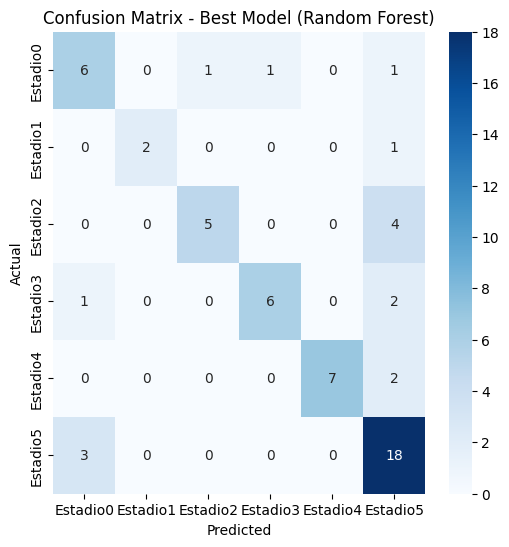

Best Model (Random Forest) AUC: 0.895
Best Model (Random Forest) AUC 95% Confidence Interval: [0.796, 0.956]


In [ ]:
# Load the dataset
df = pd.read_csv('2025.02.13-miniNir (solucoes simples)-Creatinina-Estadio.csv', delimiter=';', encoding='latin-1', decimal=',')

# Extract X (columns D to I) and y (column C)
X = df.iloc[:, 4:10].replace(',', '.', regex=True).astype(float)  # Convert to numeric
y = df['Estadio']  # Column C as target variable

# Encode target labels to classes
le = LabelEncoder()
y_encoded = le.fit_transform(df["Estadio"])

# Extract numerical features (LED1 to LED6)
X = df.iloc[:, 4:10]

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into Calibration (Train) and Validation (Test) sets
X_cal, X_val, y_cal, y_val = train_test_split(X_scaled, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)

# Function to compute specificity for multi-class classification
def compute_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity_scores = []

    for i in range(cm.shape[0]):  # Iterate over each class
        TN = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])  # True Negatives
        FP = np.sum(cm[:, i]) - cm[i, i]  # False Positives

        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # Avoid division by zero
        specificity_scores.append(specificity)

    return np.mean(specificity_scores)  # Average specificity across all classes

# Updated function to evaluate models on both training and validation sets
def evaluate_model_with_specificity(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # Predictions & Probabilities for both Training & Validation
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_proba = model.predict_proba(X_train) if hasattr(model, "predict_proba") else None
    y_test_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Compute metrics for Training Set
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    specificity_train = compute_specificity(y_train, y_train_pred)

    auc_train = roc_auc_score(y_train, y_train_proba, multi_class='ovr') if y_train_proba is not None else None

    # Compute metrics for Validation Set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    specificity_test = compute_specificity(y_test, y_test_pred)

    auc_test = roc_auc_score(y_test, y_test_proba, multi_class='ovr') if y_test_proba is not None else None

    # Print Training Metrics
    print(f"\n{model_name} Training Performance:")
    print(f"Accuracy: {accuracy_train:.3f} | Precision: {precision_train:.3f} | Recall: {recall_train:.3f} | F1 Score: {f1_train:.3f} | Specificity: {specificity_train:.3f} | AUC: {auc_train:.3f}" if auc_train is not None else "N/A")

    # Print Validation Metrics
    print(f"\n{model_name} Validation Performance:")
    print(f"Accuracy: {accuracy_test:.3f} | Precision: {precision_test:.3f} | Recall: {recall_test:.3f} | F1 Score: {f1_test:.3f} | Specificity: {specificity_test:.3f} | AUC: {auc_test:.3f}" if auc_test is not None else "N/A")

    return {
        "train": (accuracy_train, precision_train, recall_train, f1_train, specificity_train, auc_train),
        "test": (accuracy_test, precision_test, recall_test, f1_test, specificity_test, auc_test),
    }

# Re-define models (ensure LDA, SVM, RF, and GB are properly imported)
models = {
    "LDA": LDA(),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
}

# Evaluate all models on both training and validation sets
model_results = {}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    model_results[model_name] = evaluate_model_with_specificity(model, model_name, X_cal, X_val, y_cal, y_val)

# Find the best model based on validation accuracy
best_model_name = max(model_results, key=lambda x: model_results[x]["test"][0])  # Max test accuracy
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Compute predictions for the validation set using the best model
y_best_pred = best_model.predict(X_val)

# Compute confusion matrix for validation set
cm_best = confusion_matrix(y_val, y_best_pred)

# Plot confusion matrix for the best model
plt.figure(figsize=(6, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix - Best Model ({best_model_name})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Define a function to compute AUC CI on the validation set
def calculate_auc_ci(model, X_train, y_train, X_val, y_val, n_bootstraps=1000, confidence_level=0.95):
    auc_scores = []
    rng = np.random.RandomState(42)

    for _ in range(n_bootstraps):
        # Bootstrap resampling from validation set
        indices = rng.choice(len(X_val), len(X_val), replace=True)
        X_sample = X_val[indices]
        y_sample = y_val[indices]

        # Predict probabilities without retraining the model
        y_proba = model.predict_proba(X_sample)

        # Check if y_sample has all classes from training
        unique_y_sample = np.unique(y_sample)
        if len(unique_y_sample) < len(np.unique(y_train)):
            auc_scores.append(np.nan)
        else:
            auc = roc_auc_score(y_sample, y_proba, multi_class='ovr')
            auc_scores.append(auc)

    # Filter out nan values and calculate mean and confidence interval
    auc_scores_filtered = [x for x in auc_scores if not np.isnan(x)]
    if not auc_scores_filtered:
        return np.nan, (np.nan, np.nan), auc_scores # return nan if there is not auc score

    lower_bound = np.percentile(auc_scores_filtered, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(auc_scores_filtered, (1 + confidence_level) / 2 * 100)

    return np.mean(auc_scores_filtered), (lower_bound, upper_bound), auc_scores

# Train the best model (Gradient Boosting in this case) on Calibration set
best_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
best_model.fit(X_cal, y_cal)

# Compute AUC CI on validation set
best_model_auc, best_model_auc_ci, bootstrapped_aucs = calculate_auc_ci(best_model, X_cal, y_cal, X_val, y_val, n_bootstraps=100)

# Print the results
print(f"Best Model ({best_model_name}) AUC: {best_model_auc:.3f}")
print(f"Best Model ({best_model_name}) AUC 95% Confidence Interval: [{best_model_auc_ci[0]:.3f}, {best_model_auc_ci[1]:.3f}]")



In [ ]:
# Save the best model
model_mapping = {
    "lda": models["LDA"],
    "svm": models["SVM"],
    "random_forest": models["Random Forest"],
    "gradient_boosting": models["Gradient Boosting"]
}
best_model = model_mapping[best_model_name.lower().replace(" ", "_")] # Convert "Random Forest" to "random_forest" for eval
joblib.dump(best_model, "best_model.joblib")
print(f"{best_model_name} model saved as 'best_model.joblib'.")

Random Forest model saved as 'best_model.joblib'.


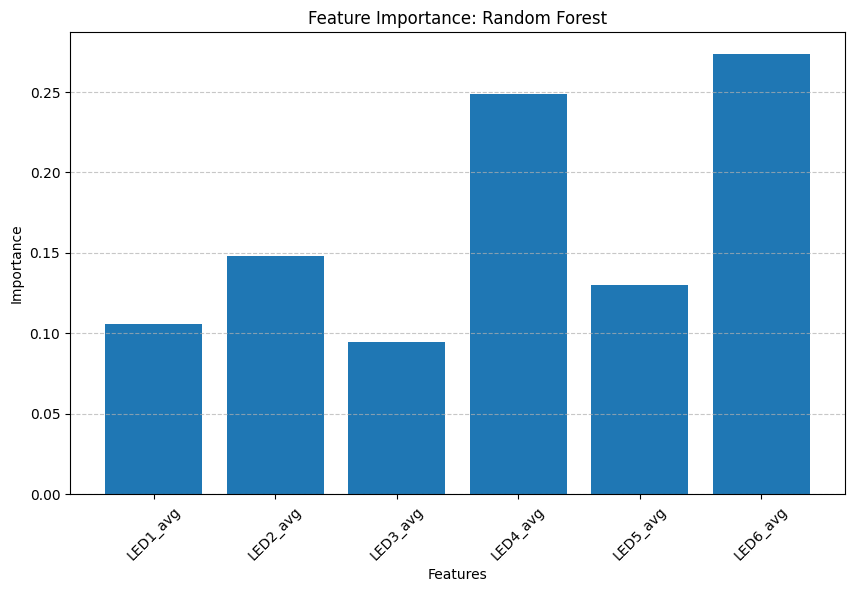

In [ ]:
# Feature Importance for the Best Model
if best_model_name == "Random Forest":
    # Random Forest feature importance
    feature_importances = best_model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
    plt.title('Feature Importance: Random Forest')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

elif best_model_name == "Gradient Boosting":
    # Gradient Boosting feature importance
    feature_importances = best_model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
    plt.title('Feature Importance: Gradient Boosting')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

elif best_model_name == "LDA":
    # LDA feature importance (absolute coefficients)
    lda_importances = np.abs(best_model.coef_).mean(axis=0)  # Average across classes for multi-class
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(lda_importances)), lda_importances, tick_label=X.columns)
    plt.title('Feature Importance: LDA')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

elif best_model_name == "SVM" and isinstance(best_model, SVC) and best_model.kernel == 'linear':
    # SVM (linear kernel) feature importance
    svm_importances = np.abs(best_model.coef_).mean(axis=0)
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(svm_importances)), svm_importances, tick_label=X.columns)
    plt.title('Feature Importance: SVM (Linear Kernel)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Feature importance not available for this model.")

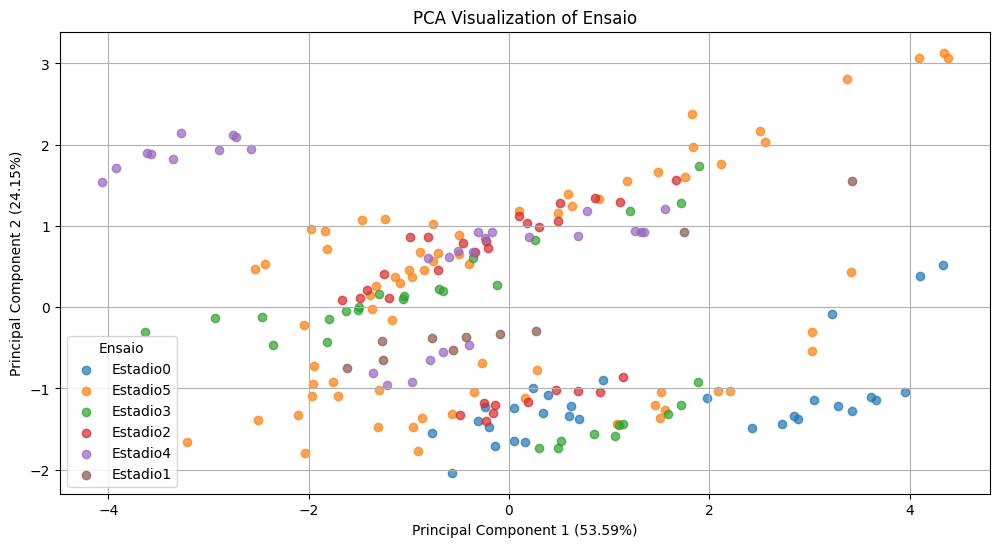

In [ ]:
# Perform PCA on the preprocessed data (after SNV and scaling)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Add the PCA components to the dataframe for visualization
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Ensaio'] = y.values

# Calculate explained variance percentages
explained_variance = pca.explained_variance_ratio_ * 100

# Visualization of PCA results
plt.figure(figsize=(12, 6))
for label in pca_df['Ensaio'].unique():
    subset = pca_df[pca_df['Ensaio'] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=label, alpha=0.7)

plt.title('PCA Visualization of Ensaio')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.legend(title='Ensaio')
plt.grid(True)
plt.show()

In [ ]:
# Load the best model and perform inference on new data
loaded_model = joblib.load("best_model.joblib")

In [ ]:
uploaded = files.upload()

Saving 2024.12.06-Solucoes compostas.csv to 2024.12.06-Solucoes compostas (1).csv


In [ ]:
new_data = pd.read_csv('2024.12.06-Solucoes compostas (1).csv', delimiter=';', encoding='latin-1')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predictions saved to 'predicted_solucoes.csv'.


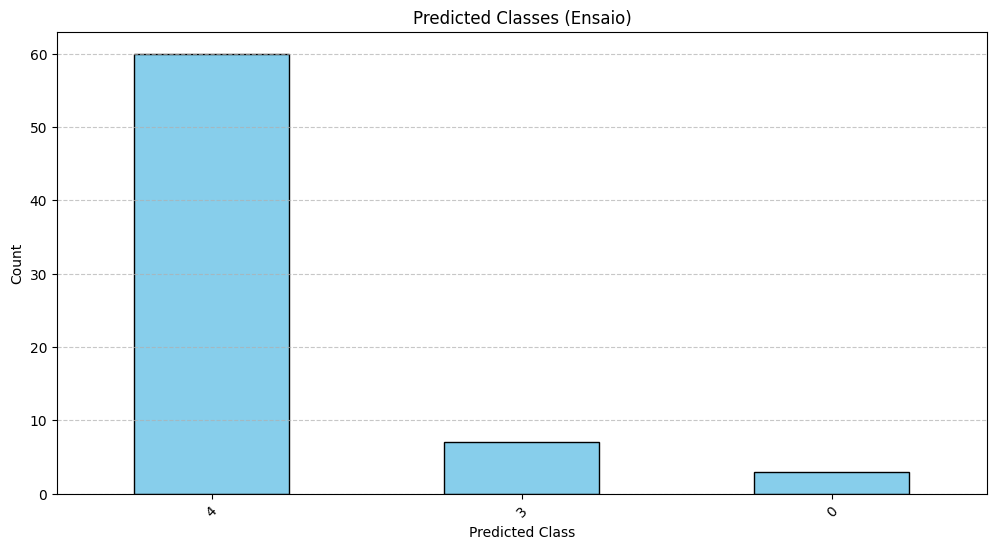

In [ ]:
X_new = new_data.iloc[:, 4:10].replace(',', '.', regex=True).astype(float)  # Extract X variables
X_new_smooth = savgol_filter(X_new, window_length=11, polyorder=2, axis=0)
X_new_snv = (X_new_smooth - np.mean(X_new_smooth, axis=0)) / np.std(X_new_smooth, axis=0)
X_new_scaled = scaler.transform(X_new_snv)

# Predict the Ensaio column
predictions = loaded_model.predict(X_new_scaled)
new_data['Predicted_Ensaio'] = predictions

# Save predictions to a new CSV
new_data.to_csv("predicted_solucoes.csv", index=False)
print("Predictions saved to 'predicted_solucoes.csv'.")

# Visualization of Predictions
plt.figure(figsize=(12, 6))
pred_counts = new_data['Predicted_Ensaio'].value_counts()
pred_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Predicted Classes (Ensaio)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Correct way to print the contents of a file:
with open('predicted_solucoes.csv', 'r') as f:
    # Read the contents of the file and store it in a variable
    predicted_solucoes_content = f.read()
    print(predicted_solucoes_content)  # Print the content

EnsaioId,Conc,Ensaio,LED1_avg,LED2_avg,LED3_avg,LED4_avg,LED5_avg,LED6_avg,Predicted conc,Genero,Idade,Estadio,Unnamed: 13,Unnamed: 14,Predicted_Ensaio
852,,23,"2,64957","0,362834","2,64156","0,96831","2,65052","2,6471","2,1091",,,0,1,FALSO,4
852,,23,"2,64942","0,362793","2,6415","0,969421","2,65041","2,64707","2,1036",,,0,1,FALSO,4
852,,23,"2,64948","0,362331","2,64146","0,969395","2,65041","2,64696","2,3148",,,0,1,FALSO,4
852,,23,"2,6493","0,362511","2,64137","0,969789","2,65034","2,64699","2,4211",,,0,1,FALSO,4
852,,23,"2,64936","0,362579","2,64136","0,969387","2,65041","2,64686","2,30425",,,0,1,FALSO,4
852,,23,"2,64931","0,36245","2,64122","0,970235","2,65024","2,64695","2,11595",,,0,1,FALSO,4
852,,23,"2,64929","0,362429","2,64129","0,969116","2,65022","2,64689","2,0355",,,0,1,FALSO,4
852,,23,"2,64919","0,362659","2,64126","0,969447","2,6502","2,64694","2,3006",,,0,1,FALSO,4
852,,23,"2,64924","0,3626","2,64122","0,969768","2,65027","2,64683","2,3224",,,0,1,FALSO,4
852,,23,"2,64918"

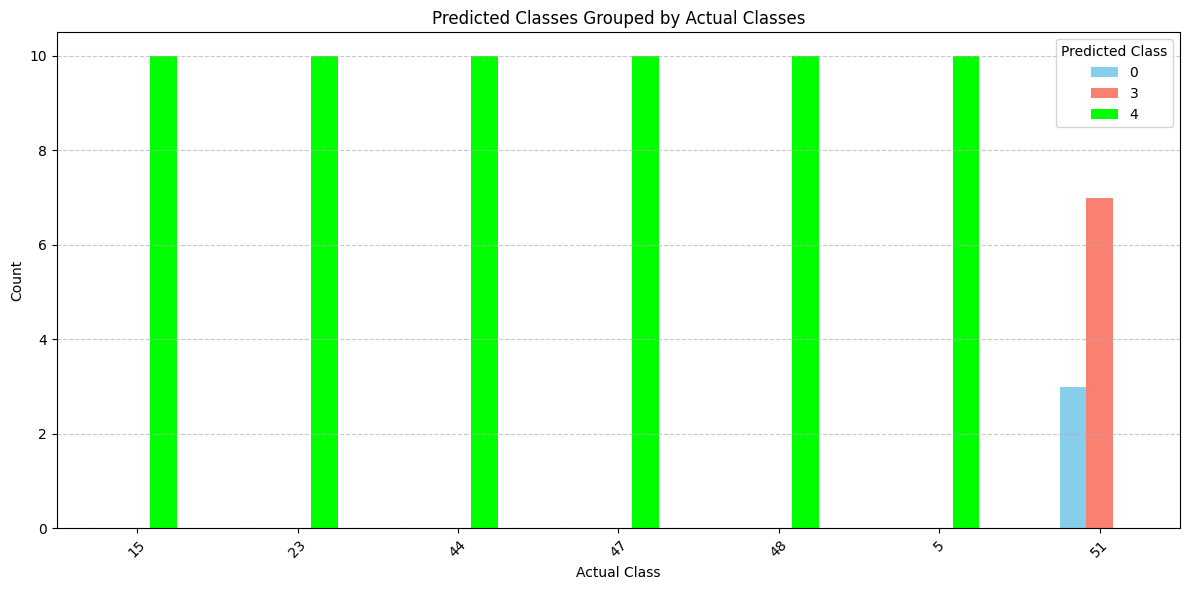

In [ ]:
# Grouping Predictions by Actual Classes
if 'Ensaio' in new_data.columns:  # Ensure actual classes are available
    # Convert 'Ensaio' and 'Predicted_Ensaio' to a consistent, plottable type
    # This assumes both columns represent categorical data
    new_data['Ensaio'] = new_data['Ensaio'].astype(str)
    new_data['Predicted_Ensaio'] = new_data['Predicted_Ensaio'].astype(str)

    grouped_data = new_data.groupby(['Ensaio', 'Predicted_Ensaio']).size().unstack(fill_value=0)

    # Plot the grouped data
    grouped_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['skyblue', 'salmon', 'lime'])
    plt.title("Predicted Classes Grouped by Actual Classes")
    plt.xlabel("Actual Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Predicted Class")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Actual classes ('Ensaio') not available for grouping.")

In [ ]:
files.download('predicted_solucoes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>